# Derivation of the System Dynamics 
> with [2 DOF, 2 Muscles]
> 
> using Python-Sympy to derivate system dynamics with the Lagrangian Equation

In [1]:
import numpy as np
import sympy as sp
from sympy.utilities.lambdify import lambdify
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, Point, LagrangesMethod
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import solve_ivp
import pandas as pd


## Kinematics


In [2]:
t = sp.symbols('t')
l1, l2, b1, b2 = sp.symbols('l_1 l_2 b_1 b_2')
d1, d2 = sp.symbols('d_1 d_2')
beta1, beta2 = sp.symbols('beta_1 beta_2')
m1, m2 = sp.symbols('m_1 m_2')
g = sp.symbols('g')

# actuator parameters
m3, m4, k3, k4, c3, c4, l10, l20 = sp.symbols('m_3 m_4 k_3 k_4 c_3 c_4 l10, l20')

# generalized coordinates: angle and angular velocity
theta1, theta2 = dynamicsymbols('theta_1 theta_2')
theta1d, theta2d = dynamicsymbols('theta_1 theta_2', 1)

# Link0 (base)
N = ReferenceFrame('N') # ReferenceFrame (base)
L_1 = N.orientnew('L_1', 'Axis', [theta1, N.z]) # ReferenceFrame L_1
L_2 = L_1.orientnew('L_2', 'Axis', [theta2, N.z]) # ReferenceFrame L_2
O = Point('O')
A = O.locatenew('A', d1 * N.x)
B = O.locatenew('B', -d2 * N.x)

# Link1
O_1 = O.locatenew('O_1', 0)
E = O_1.locatenew('E', l1 * L_1.x)
C = O_1.locatenew('C', b1 * sp.cos(-beta1) * L_1.x + b1 * sp.sin(-beta1) * L_1.y)

# Link2
O_2 = O_1.locatenew('O_2', l1 * L_1.x)
F = O_2.locatenew('F', l2 * L_2.x)
D = O_2.locatenew('D', b2 * sp.cos(beta2) * L_2.x + b2 * sp.sin(beta2) * L_2.y)

O_pos = O.pos_from(O).express(N).simplify()
A_pos = A.pos_from(O).express(N).simplify()
B_pos = B.pos_from(O).express(N).simplify()
C_pos = C.pos_from(O).express(N).simplify()
D_pos = D.pos_from(O).express(N).simplify()
E_pos = E.pos_from(O).express(N).simplify()
F_pos = F.pos_from(O).express(N).simplify()
print("--pos check--")
display(O_pos)
display(A_pos)
display(B_pos)
display(C_pos)
display(D_pos)
display(E_pos)
display(F_pos)

# velocity, for further derivation in Lagrangian
O.set_vel(N, 0)
A.v2pt_theory(O, N, N)
B.v2pt_theory(O, N, N)
C.v2pt_theory(O_1, N, L_1)
E.v2pt_theory(O_1, N, L_1)
D.v2pt_theory(O_2, N, L_2)
F.v2pt_theory(O_2, N, L_2)

# velocity using original vel
_A_vel = A.vel(N).express(N).simplify()
_B_vel = B.vel(N).express(N).simplify()
_C_vel = C.vel(N).express(N).simplify()
_D_vel = D.vel(N).express(N).simplify()
_E_vel = E.vel(N).express(N).simplify()
_F_vel = F.vel(N).express(N).simplify()
print("--vel check (using original vel)--")
display(_A_vel)
display(_B_vel)
display(_C_vel)
display(_D_vel)
display(_E_vel)
display(_F_vel)

# velocity using manual derivative
A_v = sp.diff(A_pos, t, N)
B_v = sp.diff(B_pos, t, N)
C_v = sp.diff(C_pos, t, N)
D_v = sp.diff(D_pos, t, N)
E_v = sp.diff(E_pos, t, N)
F_v = sp.diff(F_pos, t, N)
print("--vel check (using manual derivative)--")
display(A_v)
display(B_v)
display(C_v)
display(D_v)
display(E_v)
display(F_v)

--pos check--


0

d_1*N.x

- d_2*N.x

b_1*cos(beta_1 - theta_1(t))*N.x - b_1*sin(beta_1 - theta_1(t))*N.y

(b_2*cos(beta_2 + theta_1(t) + theta_2(t)) + l_1*cos(theta_1(t)))*N.x + (b_2*sin(beta_2 + theta_1(t) + theta_2(t)) + l_1*sin(theta_1(t)))*N.y

l_1*cos(theta_1(t))*N.x + l_1*sin(theta_1(t))*N.y

(l_1*cos(theta_1(t)) + l_2*cos(theta_1(t) + theta_2(t)))*N.x + (l_1*sin(theta_1(t)) + l_2*sin(theta_1(t) + theta_2(t)))*N.y

--vel check (using original vel)--


0

0

b_1*sin(beta_1 - theta_1(t))*Derivative(theta_1(t), t)*N.x + b_1*cos(beta_1 - theta_1(t))*Derivative(theta_1(t), t)*N.y

(-b_2*sin(beta_2 + theta_1(t) + theta_2(t))*Derivative(theta_1(t), t) - b_2*sin(beta_2 + theta_1(t) + theta_2(t))*Derivative(theta_2(t), t) - l_1*sin(theta_1(t))*Derivative(theta_1(t), t))*N.x + (b_2*cos(beta_2 + theta_1(t) + theta_2(t))*Derivative(theta_1(t), t) + b_2*cos(beta_2 + theta_1(t) + theta_2(t))*Derivative(theta_2(t), t) + l_1*cos(theta_1(t))*Derivative(theta_1(t), t))*N.y

- l_1*sin(theta_1(t))*Derivative(theta_1(t), t)*N.x + l_1*cos(theta_1(t))*Derivative(theta_1(t), t)*N.y

(-l_1*sin(theta_1(t))*Derivative(theta_1(t), t) - l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*sin(theta_1(t) + theta_2(t)))*N.x + (l_1*cos(theta_1(t))*Derivative(theta_1(t), t) + l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*cos(theta_1(t) + theta_2(t)))*N.y

--vel check (using manual derivative)--


0

0

b_1*sin(beta_1 - theta_1(t))*Derivative(theta_1(t), t)*N.x + b_1*cos(beta_1 - theta_1(t))*Derivative(theta_1(t), t)*N.y

(-b_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*sin(beta_2 + theta_1(t) + theta_2(t)) - l_1*sin(theta_1(t))*Derivative(theta_1(t), t))*N.x + (b_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*cos(beta_2 + theta_1(t) + theta_2(t)) + l_1*cos(theta_1(t))*Derivative(theta_1(t), t))*N.y

- l_1*sin(theta_1(t))*Derivative(theta_1(t), t)*N.x + l_1*cos(theta_1(t))*Derivative(theta_1(t), t)*N.y

(-l_1*sin(theta_1(t))*Derivative(theta_1(t), t) - l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*sin(theta_1(t) + theta_2(t)))*N.x + (l_1*cos(theta_1(t))*Derivative(theta_1(t), t) + l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*cos(theta_1(t) + theta_2(t)))*N.y

## Energy Analysis
Kinetic Energy (T) and Potential Energy (V)


In [3]:
# Link
## T
I1 = 1/12 * m1 * l1**2  # Link1's Moment of Inertia
I2 = 1/12 * m2 * l2**2  # Link2's Moment of Inertia
v_l1_com = 0.5 * (0 + E_v).magnitude()
v_l2_com = 0.5 * (E_v + F_v).magnitude()
T_l1 = 1/2 * m1 * v_l1_com**2 + 1/2 * I1 * theta1d**2
T_l2 = 1/2 * m2 * v_l2_com**2 + 1/2 * I2 * (theta1d + theta2d)**2

## Vg
pos_l1_com = 0.5 * (O_pos + E_pos)
pos_l2_com = 0.5 * (E_pos + F_pos)
Vg_l1 = -m1 * g * pos_l1_com.dot(N.y)
Vg_l2 = -m2 * g * pos_l2_com.dot(N.y)

# Muscle
## T
T_muscle1 = 1/6 * m3 * (C_v.magnitude()**2 + A_v.magnitude()**2 + A_v.dot(C_v))
T_muscle2 = 1/6 * m4 * (B_v.magnitude()**2 + D_v.magnitude()**2 + D_v.dot(B_v))

## Vg
pos_muscle1_com = 0.5 * (C_pos + A_pos)
pos_muscle2_com = 0.5 * (B_pos + D_pos)
Vg_muscle1 = -m3 * g * pos_muscle1_com.dot(N.y)
Vg_muscle2 = -m4 * g * pos_muscle2_com.dot(N.y)

## Ve
Ve_muscle1 = k3 * ((C_pos - A_pos).magnitude()-l10)**2 / 2
Ve_muscle2 = k4 * ((B_pos - D_pos).magnitude()-l20)**2 / 2

# Generalized forces (later)
print("--T and V check--")
print("T of link1: ", T_l1)
print("T of link2: ", T_l2)
print("Vg of link1: ", Vg_l1)
print("Vg of link2: ", Vg_l2)
print("T of muscle1: ", T_muscle1)
print("T of muscle2: ", T_muscle2)
print("Vg of muscle1: ", Vg_muscle1)
print("Vg of muscle2: ", Vg_muscle2)
print("Ve of muscle1: ", Ve_muscle1)
print("Ve of muscle2: ", Ve_muscle2)

# totally right!

--T and V check--
T of link1:  0.0416666666666667*l_1**2*m_1*Derivative(theta_1(t), t)**2 + 0.5*m_1*(0.25*l_1**2*sin(theta_1(t))**2*Derivative(theta_1(t), t)**2 + 0.25*l_1**2*cos(theta_1(t))**2*Derivative(theta_1(t), t)**2)
T of link2:  0.0416666666666667*l_2**2*m_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))**2 + 0.5*m_2*(0.25*(-2*l_1*sin(theta_1(t))*Derivative(theta_1(t), t) - l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*sin(theta_1(t) + theta_2(t)))**2 + 0.25*(2*l_1*cos(theta_1(t))*Derivative(theta_1(t), t) + l_2*(Derivative(theta_1(t), t) + Derivative(theta_2(t), t))*cos(theta_1(t) + theta_2(t)))**2)
Vg of link1:  -0.5*g*l_1*m_1*sin(theta_1(t))
Vg of link2:  -g*m_2*(1.0*l_1*sin(theta_1(t)) + 0.5*l_2*sin(theta_1(t) + theta_2(t)))
T of muscle1:  0.166666666666667*m_3*(b_1**2*sin(beta_1 - theta_1(t))**2*Derivative(theta_1(t), t)**2 + b_1**2*cos(beta_1 - theta_1(t))**2*Derivative(theta_1(t), t)**2)
T of muscle2:  0.166666666666667*m_4*((-b_2*(Derivative(theta

In [4]:
# Lagrangian
T = T_l1 + T_l2 + T_muscle1 + T_muscle2
Vg = Vg_l1 + Vg_l2 + Vg_muscle1 + Vg_muscle2 + Ve_muscle1 + Ve_muscle2
L = T - Vg

# Generalized forces
F1 = sp.Function('F_1')(t)
F2 = sp.Function('F_2')(t)
e_AC = (C_pos - A_pos).normalize()
e_CA = (A_pos - C_pos).normalize()
e_BD = (D_pos - B_pos).normalize()
e_DB = (B_pos - D_pos).normalize()

# TODO: Check for singularities
vec_AC = C_pos - A_pos
vel_AC = sp.diff(vec_AC, t, N)
ld_AC = (vec_AC.dot(vel_AC)) / vec_AC.magnitude()

vec_BD = D_pos - B_pos
vel_BD = sp.diff(vec_BD, t, N)
ld_BD = (vec_BD.dot(vel_BD)) / vec_BD.magnitude()

# NOTE: need to define velocity for generalized forces
FL = [(C, (F1-c3*ld_AC) * e_AC), (A, (F1-c3*ld_AC) * e_CA), (D, (F2-c4*ld_BD) * e_BD), (B, (F2-c4*ld_BD) * e_DB)]

# Solve the dynamics, NOTE: the speed of points is automatically calculated (implicit differentiation)
LM = LagrangesMethod(L, [theta1, theta2], forcelist=FL, frame=N)
LM.form_lagranges_equations()

Matrix([
[-0.5*b_1*g*m_3*cos(beta_1 - theta_1(t)) - b_1*(-b_1*(-c_3*(-b_1**2*sin(beta_1 - theta_1(t))*cos(beta_1 - theta_1(t))*Derivative(theta_1(t), t) + b_1*(b_1*cos(beta_1 - theta_1(t)) - d_1)*sin(beta_1 - theta_1(t))*Derivative(theta_1(t), t))/sqrt(b_1**2*sin(beta_1 - theta_1(t))**2 + (b_1*cos(beta_1 - theta_1(t)) - d_1)**2) + F_1(t))*sin(beta_1 - theta_1(t))*sin(theta_1(t))/sqrt(b_1**2*sin(beta_1 - theta_1(t))**2 + (b_1*cos(beta_1 - theta_1(t)) - d_1)**2) + (b_1*cos(beta_1 - theta_1(t)) - d_1)*(-c_3*(-b_1**2*sin(beta_1 - theta_1(t))*cos(beta_1 - theta_1(t))*Derivative(theta_1(t), t) + b_1*(b_1*cos(beta_1 - theta_1(t)) - d_1)*sin(beta_1 - theta_1(t))*Derivative(theta_1(t), t))/sqrt(b_1**2*sin(beta_1 - theta_1(t))**2 + (b_1*cos(beta_1 - theta_1(t)) - d_1)**2) + F_1(t))*cos(theta_1(t))/sqrt(b_1**2*sin(beta_1 - theta_1(t))**2 + (b_1*cos(beta_1 - theta_1(t)) - d_1)**2))*sin(beta_1) - b_1*(-b_1*(-c_3*(-b_1**2*sin(beta_1 - theta_1(t))*cos(beta_1 - theta_1(t))*Derivative(theta_1(t), t) + 

In [5]:
M = LM.mass_matrix          # Mass Matrix M(q)
F = LM.forcing              # Force F(q, q̇)
M, F

(Matrix([
 [0.0833333333333333*l_1**2*m_1 + 0.0833333333333333*l_2**2*m_2 + 0.5*m_1*(0.5*l_1**2*sin(theta_1(t))**2 + 0.5*l_1**2*cos(theta_1(t))**2) + 0.5*m_2*(0.25*(-4*l_1*sin(theta_1(t)) - 2*l_2*sin(theta_1(t) + theta_2(t)))*(-2*l_1*sin(theta_1(t)) - l_2*sin(theta_1(t) + theta_2(t))) + 0.25*(2*l_1*cos(theta_1(t)) + l_2*cos(theta_1(t) + theta_2(t)))*(4*l_1*cos(theta_1(t)) + 2*l_2*cos(theta_1(t) + theta_2(t)))) + 0.166666666666667*m_3*(2*b_1**2*sin(beta_1 - theta_1(t))**2 + 2*b_1**2*cos(beta_1 - theta_1(t))**2) + 0.166666666666667*m_4*((-2*b_2*sin(beta_2 + theta_1(t) + theta_2(t)) - 2*l_1*sin(theta_1(t)))*(-b_2*sin(beta_2 + theta_1(t) + theta_2(t)) - l_1*sin(theta_1(t))) + (b_2*cos(beta_2 + theta_1(t) + theta_2(t)) + l_1*cos(theta_1(t)))*(2*b_2*cos(beta_2 + theta_1(t) + theta_2(t)) + 2*l_1*cos(theta_1(t)))), 0.0833333333333333*l_2**2*m_2 + 0.5*m_2*(-0.25*l_2*(-4*l_1*sin(theta_1(t)) - 2*l_2*sin(theta_1(t) + theta_2(t)))*sin(theta_1(t) + theta_2(t)) + 0.25*l_2*(4*l_1*cos(theta_1(t)) + 2*l

In [ ]:
states = [theta1, theta2, theta1.diff(), theta2.diff()]
params = [l1, l2, b1, b2, d1, d2, beta1, beta2, g, m1, m2, m3, m4, k3, k4, c3, c4, l10, l20]
forces = [F1, F2]

# get the acceleration expression
qdd_expr = M.LUsolve(F)

# NOTE: for F=F(t), get t in: lambdify
# Transfer the symbolic function 'qdd_expr' to a NumPy function 'qdd_func' for numerical simulation.
qdd_func = lambdify(states + params + forces, qdd_expr, 'numpy')
qdd_expr

Matrix([
[(0.5*b_1*g*m_3*cos(beta_1 - theta_1(t)) + b_1*(-b_1*(-c_3*(-b_1**2*sin(beta_1 - theta_1(t))*cos(beta_1 - theta_1(t))*Derivative(theta_1(t), t) + b_1*(b_1*cos(beta_1 - theta_1(t)) - d_1)*sin(beta_1 - theta_1(t))*Derivative(theta_1(t), t))/sqrt(b_1**2*sin(beta_1 - theta_1(t))**2 + (b_1*cos(beta_1 - theta_1(t)) - d_1)**2) + F_1(t))*sin(beta_1 - theta_1(t))*sin(theta_1(t))/sqrt(b_1**2*sin(beta_1 - theta_1(t))**2 + (b_1*cos(beta_1 - theta_1(t)) - d_1)**2) + (b_1*cos(beta_1 - theta_1(t)) - d_1)*(-c_3*(-b_1**2*sin(beta_1 - theta_1(t))*cos(beta_1 - theta_1(t))*Derivative(theta_1(t), t) + b_1*(b_1*cos(beta_1 - theta_1(t)) - d_1)*sin(beta_1 - theta_1(t))*Derivative(theta_1(t), t))/sqrt(b_1**2*sin(beta_1 - theta_1(t))**2 + (b_1*cos(beta_1 - theta_1(t)) - d_1)**2) + F_1(t))*cos(theta_1(t))/sqrt(b_1**2*sin(beta_1 - theta_1(t))**2 + (b_1*cos(beta_1 - theta_1(t)) - d_1)**2))*sin(beta_1) + b_1*(-b_1*(-c_3*(-b_1**2*sin(beta_1 - theta_1(t))*cos(beta_1 - theta_1(t))*Derivative(theta_1(t), t) + 

## Dynamic Simulation (ODE solver)

In [7]:
def F1_func(t): return 10 if t < 10 else 1.125
def F2_func(t): return 0 if t < 10 else 1

def dyn_ode(t, y, *p):
    theta1, theta2, theta1d, theta2d = y
    F1 = F1_func(t)
    F2 = F2_func(t)
    theta_dd = qdd_func(theta1, theta2, theta1d, theta2d, *p, F1, F2)
    theta_dd = np.squeeze(np.array(theta_dd)).flatten()
    return [theta1d, theta2d, theta_dd[0], theta_dd[1]]

class Parameter():
    a_1 = 0.25
    a_2 = 0.25
    b_1 = 0.21213
    b_2 = 0.1
    d_1 = 0.06
    d_2 = 0.10
    beta_1 = 8.13 / 180 * np.pi
    beta_2 = 30 / 180 * np.pi

    g = 9.8

    M = 0.155  # real value
    m_1, m_2 = 0.086, 0.1033
    I_1, I_2 = (1/12 * m_1 * 0.25**2), (1/12 * m_2 * 0.25**2)

    # NOTE: Use measured value here
    m_3, m_4 = 0.18648, 0.27266
    k_3, k_4 = 637.52/2, 631.6/2
    l_10, l_20 = 0.174, 0.2562

    # damping 
    c_3, c_4 = 22.68/2, 21.8/2

param_vals = [Parameter.a_1, Parameter.a_2, 
              Parameter.b_1, Parameter.b_2, 
              Parameter.d_1, Parameter.d_2, 
              Parameter.beta_1, Parameter.beta_2, Parameter.g, 
              Parameter.m_1, Parameter.m_2, Parameter.m_3, Parameter.m_4, 
              Parameter.k_3, Parameter.k_4, Parameter.c_3, Parameter.c_4, 
              Parameter.l_10, Parameter.l_20]
y0 = [np.pi/2, 0, 0.0, 0.0]
t_span = (0, 20)
t_eval = np.linspace(*t_span, 500)

sol = solve_ivp(dyn_ode, t_span, y0, args=tuple(param_vals), t_eval=t_eval)
print(sol)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  4.008e-02 ...  1.996e+01  2.000e+01]
        y: [[ 1.571e+00  1.471e+00 ...  1.253e+00  1.253e+00]
            [ 0.000e+00  5.590e-01 ...  1.194e+00  1.194e+00]
            [ 0.000e+00 -2.474e+00 ...  5.196e-07 -8.706e-06]
            [ 0.000e+00  1.770e+01 ...  1.231e-06  8.748e-06]]
      sol: None
 t_events: None
 y_events: None
     nfev: 1910
     njev: 0
      nlu: 0


## Save data for analysis


In [8]:
df = pd.DataFrame({
    'time': sol.t,
    'theta1': sol.y[0],
    'theta2': sol.y[1],
})
df.to_csv('data_sympy.csv', index=False)

## Animation, showing the trajectory


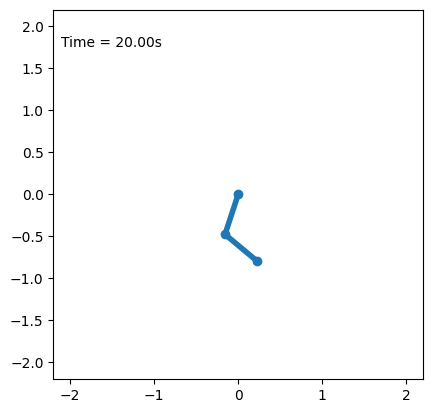

In [9]:

l1_val = 0.5
l2_val = 0.5

# depack values
theta1_vals = sol.y[0]
theta2_vals = sol.y[1]

# get the position of points
x0, y0 = 0, 0

x1 = l1_val * np.cos(theta1_vals)
y1 = l1_val * np.sin(theta1_vals)

x2 = x1 + l2_val * np.cos(theta1_vals + theta2_vals)
y2 = y1 + l2_val * np.sin(theta1_vals + theta2_vals)

# inilization of the plot
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-2.2, 2.2)
ax.set_ylim(-2.2, 2.2)
line, = ax.plot([], [], 'o-', lw=4)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def update(i):
    thisx = np.array([x0, x1[i], x2[i]])
    thisy = np.array([y0, y1[i], y2[i]])
    line.set_data(-thisx, -thisy)
    time_text.set_text(f'Time = {sol.t[i]:.2f}s')
    return line, time_text

ani = animation.FuncAnimation(
    fig, update, frames=len(sol.t),
    init_func=init, blit=True, interval=30
)

# Save the animation
# ani.save('double_pendulum.mp4', writer='ffmpeg', fps=30)
HTML(ani.to_jshtml())

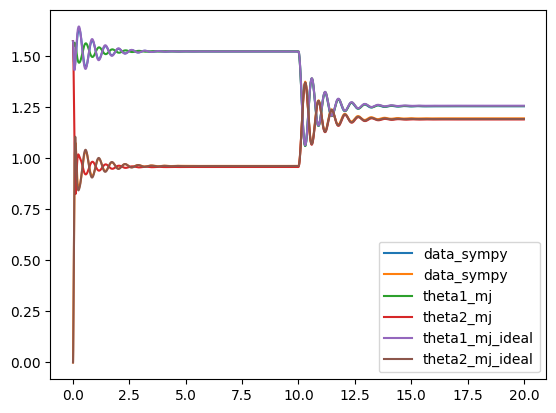

In [10]:
import pandas as pd
from matplotlib import pyplot as plt

# load and compare
traj_sp = pd.read_csv('data_sympy.csv')
traj_mj = pd.read_csv('../data/data_mj.csv')
traj_mj_ideal = pd.read_csv('../data/data_mj_ideal.csv')

plt.plot(traj_sp['time'], traj_sp['theta1'], label="data_sympy")
plt.plot(traj_sp['time'], traj_sp['theta2'], label="data_sympy")
plt.plot(traj_mj['time'], traj_mj['theta1'], label="theta1_mj")
plt.plot(traj_mj['time'], traj_mj['theta2'], label="theta2_mj")
plt.plot(traj_mj_ideal['time'], traj_mj_ideal['theta1'], label="theta1_mj_ideal")
plt.plot(traj_mj_ideal['time'], traj_mj_ideal['theta2'], label="theta2_mj_ideal")
plt.legend()